In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
n = 4
grover_circuit = QuantumCircuit(n)

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

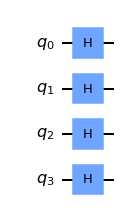

In [4]:
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])

grover_circuit.draw()

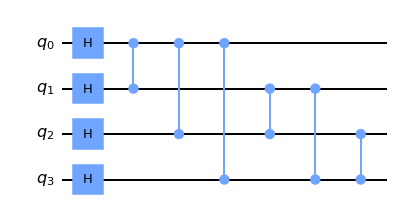

In [5]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.cz(0,2)
grover_circuit.cz(0,3)
grover_circuit.cz(1,2)
grover_circuit.cz(1,3)
grover_circuit.cz(2,3)


grover_circuit.draw()

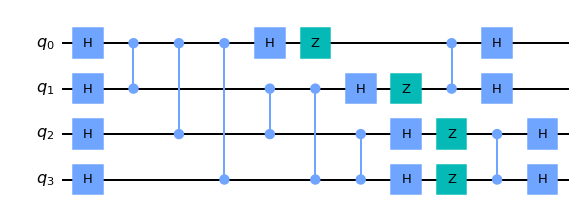

In [6]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.h([2,3])

grover_circuit.z([0,1])
grover_circuit.z([2,3])

grover_circuit.cz(0,1)
grover_circuit.cz(2,3)

grover_circuit.h([0,1])
grover_circuit.h([2,3])



grover_circuit.draw()

In [7]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Math object>

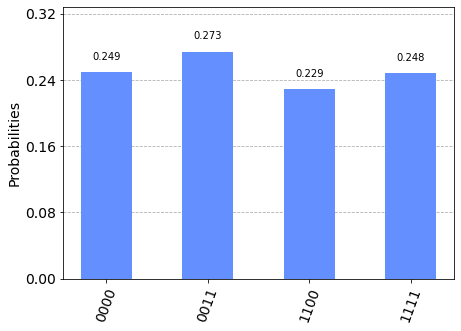

In [8]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)